<a href="https://colab.research.google.com/github/beifa/ML-models/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

In [0]:
data = load_diabetes()
y = data.target
X = data.data
print(data.DESCR) 
print('-------------------Names Features in data-----------------')
print(data.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### Model

Cost function:
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

for my:

0. $$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

1. $$h_\theta(x^{(i)}) - y^{(i)}$$

2. $$ (h_\theta(x^{(i)}) - y^{(i)}) * x_j^{(i)}$$

3. $$\sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)}$$

4. $$\theta_j - \alpha \frac{1}{m} $$



In [0]:
#we try make for only two features
def costfunc(X, y, theta):
  """
  Find cost func

  Param:
  -----
  X, y: data for model
  theta: values for lin regression param

  return: theta  
  """
  m = X.shape[0] # size all values
  # 0.
  h = np.dot(X, theta) #hypothesis(predict)
  # 1.
  J = 1/(2*m)*np.sum((h - y)**2)
  return J

def gradient(X, y, theta, alpha, num_iters):
  """
  find gradient (minimaize theta)
  
  Param:
  ------
  X, y:  data for model
  theta: values lr
  alpha: Learning rate - (скорорсть обучения или как быстро сходиться)
  num_iter: counts steps

  return: theta 
  """
  m = X.shape[0]     
  # make a copy of theta, which will be updated by gradient descent
  theta = theta.copy()
  J_history = []    
  for i in range(num_iters):
    #0. 1.
    h = np.dot(X, theta) - y
    #4.3.2
    theta = theta - 1/ m *alpha* X.T.dot(h)     
    J_history.append(costfunc(X, y, theta))   
  return theta, J_history

In [0]:
X_new = X[:, np.newaxis, 2][:50]
y_new = y[:50]

theta = np.zeros((X_new.shape[1]))
#computeCost(X, y, theta)
alpha = .1
num_iters = 10000
theta, grad = gradient(X_new, y_new, theta, alpha, num_iters)

### Test func

In [0]:
"""
find best(minimaize) theta with gradient and plot line

Take only one features and make split for test and train
"""
X_train, X_test = X[:, np.newaxis, 2][:-100], X[:, np.newaxis, 2][-100:]
y_train, y_test = y[:-100], y[-100:]
theta = np.zeros((X_train.shape[1]))
print(X_train.shape, X_test.shape)
print('_________________________')
print(y_train.shape, y_test.shape)
print(theta.shape)

(342, 1) (100, 1)
_________________________
(342,) (100,)
(1,)


In [0]:
#find theta
alpha = 1
num_iters = 10000
theta, _ = gradient(X_train, y_train, theta, alpha, num_iters)
#find predict
pred = np.mean(y_test) + np.dot(X_test, theta)

[933.75054857]


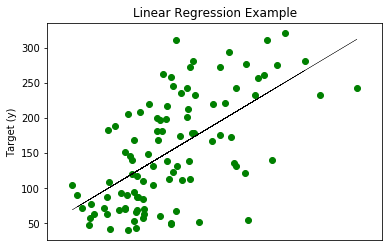

In [0]:
plt.scatter(X_test, y_test, color = 'g')
plt.plot(X_test, pred, 'k-', linewidth =.3)
plt.ylabel('Target (y)')
plt.xticks(())
plt.title('Linear Regression Example');
print(theta)

#### Check correct


[953.3606272]


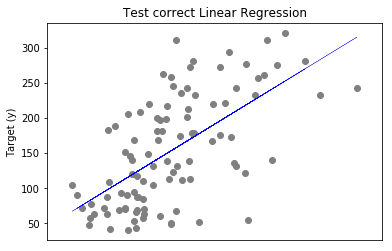

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
#plot
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, lr_predict, 'b-', linewidth =.3)
plt.ylabel('Target (y)')
plt.xticks(())
plt.title('Test correct Linear Regression');
print(lr.coef_)

### Score

Коэффициент детерминации **R-квадрат** — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными.

In [0]:
def scoreR2(y_true, y_pred):
  #coefficient R^2
  u = ((y_true - y_pred) ** 2).sum()
  v = ((y_true - y_true.mean()) ** 2).sum()
  r2 = 1 - (u / v)
  return r2

In [0]:
scoreR2(y_test, pred)

0.38042901420929953

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, lr_predict)

0.3804087960385918

### Curve Learning Rates

Theta:  933.7505288328689
Theta:  933.5994620522014
Theta:  921.5867309105574
Theta:  864.3135468032909
Theta:  540.3529293090044
Theta:  327.5271401302071
Theta:  77.25040541855893


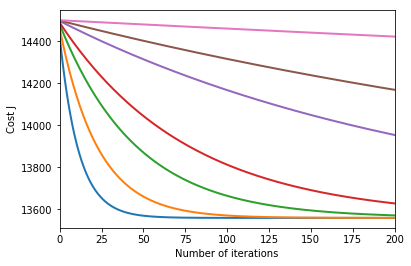

In [0]:
alphas = [20, 10, 5, 3, 1, 0.5, 0.1]
num_iters = 400

for a in alphas:
  theta = np.zeros((X_train.shape[1]))
  theta, J_history = gradient(X_train, y_train, theta, a, num_iters)
  print('Theta: ', theta[0])

  # Plot the convergence graph
  plt.plot(np.arange(len(J_history)), J_history, lw=2)
  plt.xlabel('Number of iterations')
  plt.ylabel('Cost J')
  plt.xlim(0, 200)

### Normal Equations

Использование этой формулы не требует какого-либо масштабирования объектов, и вы получите точное решение за один расчет: не существует «цикла до сходимости», как при градиентном спуске.


$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [0]:
def normalEqn(X, y):
    """
    linear regression using the normal equations.
    
    Param:
    ------
    X, y :dataset    
    Returns: theta         
    """
    theta = np.zeros(X.shape[1])    
    inv = np.linalg.pinv(np.dot(X.T, X)) #inverse matrix
    theta = np.dot(inv, np.dot(X.T, y))    
    return theta

In [0]:
normalEqn(X_train, y_train)

array([933.75054895])

Check for all data

In [0]:
normalEqn(X, y)

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [0]:
lr = LinearRegression()
lr.fit(X, y)
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

### Everything is simple Step-by-step

In [0]:
data = np.array([[34,108, 64, 88, 99,51],[5,17,11,8,14,5]]).T
df = pd.DataFrame(data, columns=('x', 'y'))
df.head()

,x,y
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14


In [0]:
xmean, ymean = df.mean()

Мы предсказываем у.

Сумма квадратов :

$min\sum (y_i - \hat{y_i)} ^ 2$


1. $\hat{y} = b_0 + b_1 x$

  $b_1 = \frac{\sum(x_i - \overline{x_i})* \sum(y_i - \overline{y_i})}{\sum(x_i - \overline{x_i}) ^ 2}$

  $b_0 = \overline{y} - b_1\overline{x}$
    
2. Center  $\overline{x}, \overline{y} = (74, 10) $

3. Calculate $\hat{y}$

4. SSE, SST, SSR

5. Coef.Determination = $r ^2$ = $\frac{SSR}{SST}$
    
    

In [0]:
df['x-xmean'] = df.x - xmean
df['y-ymean'] = df.y - ymean
df['(x-xmean)(y-ymean)'] = (df.x - xmean) * (df.y - ymean)
df['(x-xmean)** 2'] = (df.x - xmean) ** 2

,x,y,x-xmean,y-ymean,(x-xmean)(y-ymean),(x-xmean)** 2
0,34,5,-40.0,-5.0,200.0,1600.0
1,108,17,34.0,7.0,238.0,1156.0
2,64,11,-10.0,1.0,-10.0,100.0
3,88,8,14.0,-2.0,-28.0,196.0
4,99,14,25.0,4.0,100.0,625.0


In [0]:
#calculate sum 
b_1 = df['(x-xmean)(y-ymean)'].sum() / df['(x-xmean)** 2'].sum() # 0.1462
b_0 = ymean - b_1 * xmean # -0.8202

In [0]:
df['y_predicted'] = b_0 + b_1 * df.x

In [0]:
df['error'] = (df.y - df['y_predicted']) ** 2

In [0]:
df.head()

,x,y,x-xmean,y-ymean,(x-xmean)(y-ymean),(x-xmean)** 2,y_predicted,error
0,34,5,-40.0,-5.0,200.0,1600.0,4.151213,0.720440
1,108,17,34.0,7.0,238.0,1156.0,14.971469,4.114937
2,64,11,-10.0,1.0,-10.0,100.0,8.537803,6.062413
3,88,8,14.0,-2.0,-28.0,196.0,12.047076,16.378821
4,99,14,25.0,4.0,100.0,625.0,13.655492,0.118686


Text(0, 0.5, 'Axis Y')

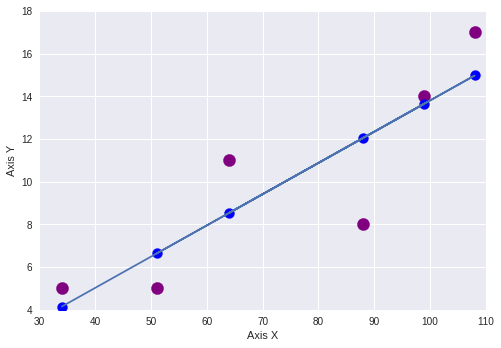

In [0]:
plt.scatter(df.x, df.y, s = 150, c = 'purple')# data
plt.scatter(df.x, df['y_predicted'], marker = 'o', s = 100, c = 'b') #predict
plt.plot(df.x, df['y_predicted'])#line regression
plt.xlim(30, 110)
plt.ylim(4, 18)
plt.xlabel('Axis X')
plt.ylabel('Axis Y')

In [0]:
sse = df.error.sum() #30.07489
sst = ((df.y - ymean) ** 2).sum() # 120
ssr = sst - sse #89.925

In [0]:
coef_determination = ssr/ sst
predict = coef_determination * 100
predict

74.93758915834522